# Data Science Immersive Project3 - 
###  -- Classification Model in Reddit posts --


### 0. Define Problem
- Find is the best model that can classifiy between the booksuggestion and basketball posts.
- Find a list of main key words which are can identify the post is booksuggestion or basketball post


### 1. Get data from Reddit web by using API 
- the two sub-reddit post are https://www.reddit.com/r/Basketball/ and https://www.reddit.com/r/booksuggestions/
- run reddit-api_P3.ipynb to get Basketball_posts.csv and booksuggestions_posts.csv
- load two files in pandas Dataframes

### 2. EDA 
- calulate the number of charactor in each posts (book & basketball)
- plot histogram for the number of charactor in each posts (book & basketball)
- plot Proportion of part of speech in posts (book & basketball)
- combine two dataframes (book & basketball) to single df_posts_train dataframe
- set target = 1 in book posts and target = 0 in basketball posts

### 3. Data preprocessing (text in the posts)
- Split data to X,y Train and Test
- Step 1. Remove non-letters. (such number, #!/()[]&$~`+= )
- Step 2. Convert to lower case.
- Step 3. Remove stopwords. (such as a, an, the, in, on, at, has, have)
- Step 4. Lemmatization, grouping words. (such as “cats” and “cat”)


### 4. Bernoulli Naive Bayes Model
- GridSearch & Pipeline to select the best estimator
- Run the model by using the best estimator
- Evaluate the model

### 5. Logistic Regression Model
- GridSearch & Pipeline to select the best estimator
- Run the model by using the best estimator
- Evaluate the model

### 6. Voting Classifier Model
- Classify by using 5 model to vote the final target
- 1. LogisticRegression()
- 2. BernoulliNB()
- 3. DecisionTreeClassifier()
- 4. AdaBoostClassifier()
- 5. GradientBoostingClassifier()
- Evaluate the model




## Conclusion 

The Bernoulli Naive Bayes model is best performance and good perform in unseen and testing data when compare with Logistic Regression Model which is slightly over fit with the training data.

### Here are the list of main keyword which can use to identify the booksuggestion post 
- read
- like
- looking
- would
- suggestion
- good
- love
- really
- something
- novel
- reading
- similar
- recommendation
- life

### Here are the list of main keyword which can use to identify the Basketball post 
- basketball
- Play
- team
- game
- ball
- kg
- nba
- player
- poll
- shot
- aau
- able dunk
- able jump 
- able play 
- access 
- adidas 
- advantage
- aggressive
- airball 
- anger



In [419]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import plot_confusion_matrix

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
%matplotlib inline

import spacy


# importing the packages i'll likely use

### 1. Get data from Reddit web by using API 

Sample posts of https://www.reddit.com/r/booksuggestions/
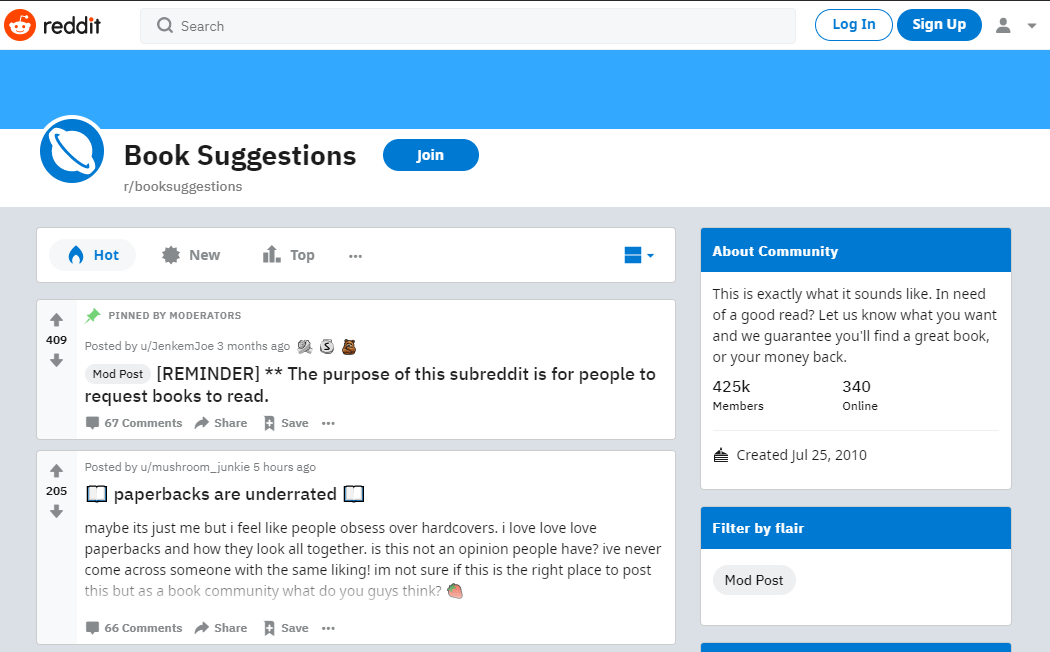

Sample posts of https://www.reddit.com/r/Basketball/
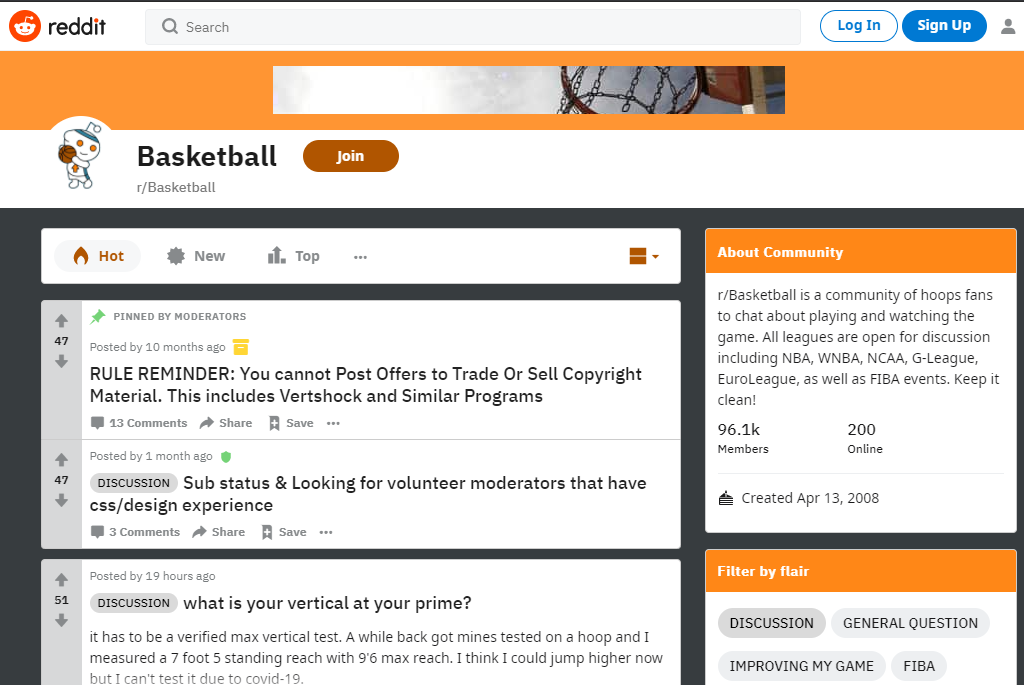

run reddit-api_P3.ipynb to get Basketball_posts.csv and booksuggestions_posts.csv

# 2. EDA 

In [331]:
#load the Basketball_posts.csv into dataframe
Basketball_posts_df = pd.read_csv('Basketball_posts.csv')

In [332]:
#drop duplicate rows and , null in selftext (picture)
df_basketball = Basketball_posts_df[['selftext','title']]
df_basketball = df_basketball.drop_duplicates()
df_basketball = df_basketball.dropna()
df_basketball.head()

,selftext,title
0,Admins have banned other subs for this.\n\nNo ...,RULE REMINDER: You cannot Post Offers to Trade...
1,### Status of /r/Basketball \n\n* As of this ...,Sub status &amp; Looking for volunteer moderat...
2,"I'm brazilian 16y, 5' 8 ft basketball player a...",Is it good?
3,Once me andy team were playing 5v5 there was a...,First of all sorry for my bad english and my b...
4,"The MVP conversation is tight, so what are you...",Who Will Win The MVP?


In [333]:
#drop pin post from admin
df_basketball = df_basketball.drop(df_basketball.index[[0]])

In [334]:
#create col for number of charactor in each post
df_basketball['posts_char_count'] = df_basketball['selftext'].str.len()

In [335]:
df_basketball.head()

,selftext,title,posts_char_count
1,### Status of /r/Basketball \n\n* As of this ...,Sub status &amp; Looking for volunteer moderat...,1679
2,"I'm brazilian 16y, 5' 8 ft basketball player a...",Is it good?,265
3,Once me andy team were playing 5v5 there was a...,First of all sorry for my bad english and my b...,373
4,"The MVP conversation is tight, so what are you...",Who Will Win The MVP?,130
5,So recently I have noticed that all my shots e...,Problem in my shot,399


In [336]:
#see the shape
df_basketball.shape

(881, 3)

In [337]:
#get avg number of char in each post
df_basketball['posts_char_count'].mean()

394.0454029511918

<AxesSubplot:ylabel='Frequency'>

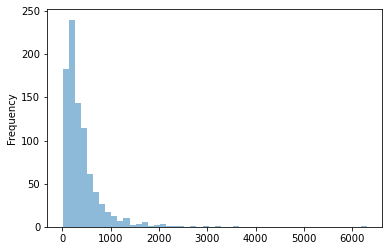

In [338]:
#plot histogram of number of char in each post
df_basketball['posts_char_count'].plot.hist(bins=50, alpha=0.5)

In [339]:
# get all words
WC_basketball = df_basketball['selftext'].tolist() 
unique_str  = ' '.join(WC_basketball)
#unique_str

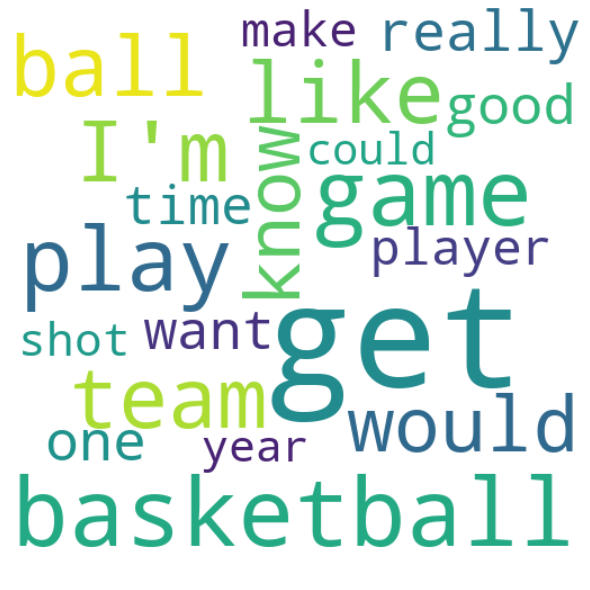

In [340]:
#show word cloud
word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords= set(stopwords.words('english')), max_words=20).generate(unique_str)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [341]:
sp = spacy.load('en_core_web_sm')

In [342]:
#get the frequency of part of speech in the posts
sen = sp(unique_str)
num_pos = sen.count_by(spacy.attrs.POS)
for k,v in sorted(num_pos.items()):
    print(f'{k}. {sen.vocab[k].text:{8}}: {v}')

84. ADJ     : 4418
85. ADP     : 6080
86. ADV     : 5175
87. AUX     : 4277
89. CCONJ   : 3134
90. DET     : 5810
91. INTJ    : 250
92. NOUN    : 12296
93. NUM     : 1986
94. PART    : 2392
95. PRON    : 8982
96. PROPN   : 2119
97. PUNCT   : 7575
98. SCONJ   : 1125
99. SYM     : 420
100. VERB    : 10752
101. X       : 69
103. SPACE   : 1217


In [343]:
#load the booksuggestions_posts.csv into dataframe
booksuggestions_posts_df = pd.read_csv('booksuggestions_posts.csv')

In [344]:
#drop duplicate rows and , null in selftext (picture)
df_booksuggestions = booksuggestions_posts_df[['selftext','title']]
df_booksuggestions = df_booksuggestions.drop_duplicates()
df_booksuggestions = df_booksuggestions.dropna()
df_booksuggestions.head()

,selftext,title
0,#Things that will get a submission removed:\n*...,[REMINDER] ** The purpose of this subreddit is...
1,I picked up *Dark Matter* by Blake Crouch from...,"Dark Matter. All I can say is, “Wow!”"
2,My sister can't get therapy but I want to help...,Can you recommend any therapy books about reco...
3,"Just for fun, I’m curious to know what everyon...",What are some novels I should avoid at ALL COSTS?
4,"I primarily read fiction, but recently read Sa...",Non-fiction books that are entertaining page-t...


In [345]:
#drop pin post from admin
df_booksuggestions = df_booksuggestions.drop(df_booksuggestions.index[[0]])

In [346]:
#create col for number of charactor in each post
df_booksuggestions['posts_char_count'] = df_booksuggestions['selftext'].str.len()

In [347]:
df_booksuggestions.head()

,selftext,title,posts_char_count
1,I picked up *Dark Matter* by Blake Crouch from...,"Dark Matter. All I can say is, “Wow!”",451
2,My sister can't get therapy but I want to help...,Can you recommend any therapy books about reco...,239
3,"Just for fun, I’m curious to know what everyon...",What are some novels I should avoid at ALL COSTS?,122
4,"I primarily read fiction, but recently read Sa...",Non-fiction books that are entertaining page-t...,384
5,I recently finished the Throne of Glass series...,Fantasy Series,194


In [348]:
#see the shape
df_booksuggestions.shape

(900, 3)

In [349]:
#get avg number of char in each post
df_booksuggestions['posts_char_count'].mean()

347.9377777777778

<AxesSubplot:ylabel='Frequency'>

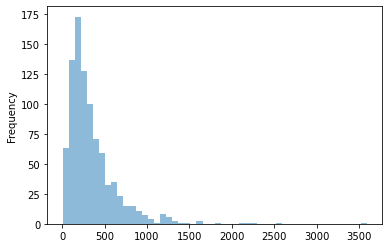

In [350]:
#plot histogram of number of char in each post
df_booksuggestions['posts_char_count'].plot.hist(bins=50, alpha=0.5)

In [351]:
# get all words
WC_book = df_booksuggestions['selftext'].tolist() 
unique_str  = ' '.join(WC_book)
#unique_str

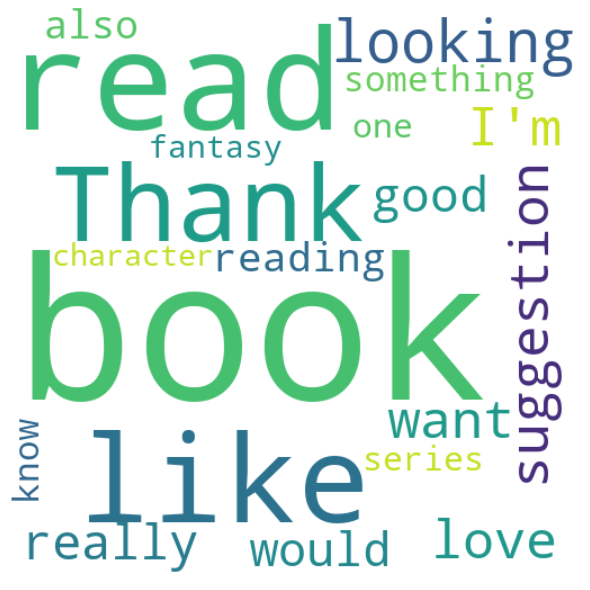

In [352]:
#show word cloud
word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords= set(stopwords.words('english')), max_words=20).generate(unique_str)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [353]:
#get the frequency of part of speech in the posts
sen = sp(unique_str)
num_pos = sen.count_by(spacy.attrs.POS)
for k,v in sorted(num_pos.items()):
    print(f'{k}. {sen.vocab[k].text:{8}}: {v}')

84. ADJ     : 4459
85. ADP     : 5698
86. ADV     : 3685
87. AUX     : 3197
89. CCONJ   : 2663
90. DET     : 5788
91. INTJ    : 345
92. NOUN    : 10498
93. NUM     : 420
94. PART    : 1836
95. PRON    : 6427
96. PROPN   : 3346
97. PUNCT   : 7809
98. SCONJ   : 709
99. SYM     : 232
100. VERB    : 8364
101. X       : 148
103. SPACE   : 1425


### Proportion of part of speech in posts (plot by Tableau)
* we can see the basketball posts has proportion of verb, adverb and number more than book posts because basketball is talk about action.
* we can see the book posts focus on Adhective, Punctuation, and Determiner.

![alt text](part_of_speech.png "Title")

In [354]:
# set target = 1 for booksuggestions posts and for target = 0 for basketball post
df_basketball['target'] = 0
df_booksuggestions['target'] = 1

In [355]:
#combile two posts into single dataframe
df_posts_train = pd.concat([df_basketball, df_booksuggestions])
df_posts_train.shape

(1781, 4)

In [356]:
df_posts_train.head()

,selftext,title,posts_char_count,target
1,### Status of /r/Basketball \n\n* As of this ...,Sub status &amp; Looking for volunteer moderat...,1679,0
2,"I'm brazilian 16y, 5' 8 ft basketball player a...",Is it good?,265,0
3,Once me andy team were playing 5v5 there was a...,First of all sorry for my bad english and my b...,373,0
4,"The MVP conversation is tight, so what are you...",Who Will Win The MVP?,130,0
5,So recently I have noticed that all my shots e...,Problem in my shot,399,0


In [357]:
#see the number of posts in each class
df_posts_train['target'].value_counts()

1    900
0    881
Name: target, dtype: int64

In [358]:
#show proportion of target
df_posts_train['target'].value_counts(normalize=True)

1    0.505334
0    0.494666
Name: target, dtype: float64

In [359]:
# combine selftext and title in text_title col
df_posts_train['text_title'] =df_posts_train['selftext'] +df_posts_train['title']

In [360]:
df_posts_train['text_title']

1      ### Status of /r/Basketball  \n\n* As of this ...
2      I'm brazilian 16y, 5' 8 ft basketball player a...
3      Once me andy team were playing 5v5 there was a...
4      The MVP conversation is tight, so what are you...
5      So recently I have noticed that all my shots e...
                             ...                        
992    I like to sketch stuff and i usually base alot...
993    Already have read Throne of Glass. Adult or YA...
994    Hello reading pals,\n\nI used to read a lot al...
995    Ok so it's kind of hard to explain exactly the...
996    Hi,\n\nMy book club's theme for next month is ...
Name: text_title, Length: 1781, dtype: object

In [361]:
df_posts_train.shape

(1781, 5)

# 3. Data preprocessing (text in the posts)

In [362]:
# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(df_posts_train[['text_title']],
                                                    df_posts_train['target'],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [363]:
#see the shapeof train/test set
X_train.shape,X_test.shape

((1246, 1), (535, 1))

In [364]:
#create function convert the texts in posts to be the clean words
lemmatizer = WordNetLemmatizer()

def posts_to_words(raw_posts):
    # Function to convert a raw posts to a string of words
    
    # 1. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", raw_posts)
    
    # 2. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 3. Remove stopwords.
    stops = set(stopwords.words('english'))
    words_remove_stop = [w for w in words if w not in stops]
    
    # 4. Lemmatization
    meaningful_words = [lemmatizer.lemmatize(i) for i in words_remove_stop]
    
    # Join the words back into one string (posts) and return the result.
    return(" ".join(meaningful_words))

In [365]:
# Initialize an empty list to hold the clean posts.
clean_train_posts = []
clean_test_posts = []

print("Cleaning and parsing the training set of reddit posts...")

#for loop to get each texts in each posts
for i,train_posts in X_train.iterrows():

    # Convert posts to words, then append to clean_train_posts.
    clean_train_posts.append(posts_to_words(train_posts[0]))
    

print("Cleaning and parsing the testing set of reddit posts...")

#for loop to get each texts in each posts
for i,train_posts in X_test.iterrows():
    
    # Convert posts to words, then append to clean_test_posts.
    clean_test_posts.append(posts_to_words(train_posts[0]))
    

Cleaning and parsing the training set of reddit posts...
Cleaning and parsing the testing set of reddit posts...


In [366]:
#see total posts
len(clean_train_posts),len(clean_test_posts)

(1246, 535)

In [367]:
# create CountVectorizer
vectorizer = CountVectorizer() 

In [368]:
# transform by using CountVectorizer
train_data_features = vectorizer.fit_transform(clean_train_posts)

test_data_features = vectorizer.transform(clean_test_posts)

In [369]:
#check shape of train and test data
train_data_features.shape,test_data_features.shape

((1246, 7288), (535, 7288))

In [370]:
#total vocab was found in train data
vocab = vectorizer.get_feature_names()
len(vocab)

7288

In [414]:
#get a Vectorize training dataframe
train_df = pd.DataFrame(train_data_features.toarray(),columns = vocab)
train_df.head()

,aa,aaaaall,aaron,aau,ab,aba,abandon,abandoning,abdominal,abdul,...,zh,zhivago,zi,zion,zombie,zone,zoning,zq,zurau,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [372]:
#get a Vectorize testing dataframe
test_df = pd.DataFrame(test_data_features.toarray(),columns = vocab)
test_df.head()

,aa,aaaaall,aaron,aau,ab,aba,abandon,abandoning,abdominal,abdul,...,zh,zhivago,zi,zion,zombie,zone,zoning,zq,zurau,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4. Bernoulli Naive Bayes Model

### PipeLine & GridSearch

In [373]:
#create pipeline
pipe_NB = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', BernoulliNB())
])

In [374]:
#see all parameters in pipeline
print(pipe_NB.get_params(deep=True))

{'memory': None, 'steps': [('cvec', CountVectorizer()), ('nb', BernoulliNB())], 'verbose': False, 'cvec': CountVectorizer(), 'nb': BernoulliNB(), 'cvec__analyzer': 'word', 'cvec__binary': False, 'cvec__decode_error': 'strict', 'cvec__dtype': <class 'numpy.int64'>, 'cvec__encoding': 'utf-8', 'cvec__input': 'content', 'cvec__lowercase': True, 'cvec__max_df': 1.0, 'cvec__max_features': None, 'cvec__min_df': 1, 'cvec__ngram_range': (1, 1), 'cvec__preprocessor': None, 'cvec__stop_words': None, 'cvec__strip_accents': None, 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b', 'cvec__tokenizer': None, 'cvec__vocabulary': None, 'nb__alpha': 1.0, 'nb__binarize': 0.0, 'nb__class_prior': None, 'nb__fit_prior': True}


In [375]:
#set hyper parameters
pipe_NB_params = {
    'cvec__max_features': [1_000,3000,4000],
    'cvec__min_df': [2,3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2),(1,3)],
    'nb__alpha':[0.,0.2,0.3 ]
}

In [376]:
#fit pipeline with training data
pipe_NB.fit(clean_train_posts,  y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('nb', BernoulliNB())])

In [377]:
#GridSearch
gs_NB = GridSearchCV(pipe_NB, # what object are we optimizing?
                  param_grid=pipe_NB_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [378]:
#fit on the training data
gs_NB.fit(clean_train_posts,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in n

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in n

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in n

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in n

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in n

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', BernoulliNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [1000, 3000, 4000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'nb__alpha': [0.0, 0.2, 0.3]})

In [379]:
#get the cv score on traing data 
gs_NB.best_score_ 

0.9967903614457831

In [380]:
#get best estimator
gs_NB_model_best_est =gs_NB.best_estimator_
gs_NB_model_best_est

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=4000, min_df=2,
                                 ngram_range=(1, 2))),
                ('nb', BernoulliNB(alpha=0.2))])

In [381]:
#get best score on test
gs_NB_model_best_est.score(clean_test_posts,y_test) # score on test data

0.9906542056074766

In [382]:
#get best parammeter
gs_NB.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 4000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'nb__alpha': 0.2}

### Bernoulli Naive Bayes Model with Best Estimator  

In [383]:
#set best param
pipe_nb_best_est = Pipeline( [('cvec',
                 CountVectorizer(max_df=0.9, max_features=4000, min_df=2,
                                 ngram_range=(1, 2))),
                ('nb', BernoulliNB(alpha=0.2))] )

In [384]:
#fit on the training data
pipe_nb_best_est.fit(clean_train_posts,  y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=4000, min_df=2,
                                 ngram_range=(1, 2))),
                ('nb', BernoulliNB(alpha=0.2))])

In [385]:
#see the score on training and testing data
print(f'Score on Train data = {pipe_nb_best_est.score(clean_train_posts, y_train)}')
print(f'Score on Test data = {pipe_nb_best_est.score(clean_test_posts, y_test)}')

Score on Train data = 0.9991974317817014
Score on Test data = 0.9906542056074766


In [387]:
#score on unseen data
cross_val_score(pipe_nb_best_est,clean_train_posts,  y_train).mean()

0.9967903614457831

In [416]:
# see get the y_pred and see the confusion_matrix
predictions = pipe_nb_best_est.predict(clean_test_posts)
confusion_matrix(y_test, predictions)

array([[257,   2],
       [  3, 273]], dtype=int64)

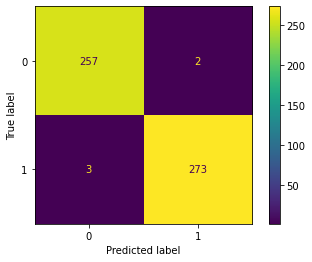

In [420]:
plot_confusion_matrix(pipe_nb_best_est, clean_test_posts, y_test) 

array([[0.00111198, 0.99888802]])

array([[0.98516389, 0.01483611]])

### Performance of model is good on training/unseen data and testing data

In [433]:
# see top words coef 
n=20 
coefs_with_fns = sorted(zip(pipe_nb_best_est[1].coef_[0], pipe_nb_best_est[0].get_feature_names()))
top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top:
    print(coef_1, fn_1, coef_2, fn_2)

-8.046229101075378 aaron -0.18257783562672625 book
-8.046229101075378 aau -0.8676836173116778 read
-8.046229101075378 aau team -0.942907038549265 like
-8.046229101075378 able dunk -0.9678875215177065 looking
-8.046229101075378 able get -1.3792723086461711 would
-8.046229101075378 able jump -1.472548934114732 suggestion
-8.046229101075378 able play -1.4937212140407876 good
-8.046229101075378 absolute -1.5080892773077075 love
-8.046229101075378 access -1.5153514733494928 really
-8.046229101075378 according -1.5677194588668089 something
-8.046229101075378 adidas -1.5754295972927759 want
-8.046229101075378 advantage -1.5910305377352554 reading
-8.046229101075378 advise -1.7076350228721946 know
-8.046229101075378 affordable -1.7714670798334389 fiction
-8.046229101075378 afternoon -1.8098595108716733 thanks
-8.046229101075378 age height -1.8808112468439573 similar
-8.046229101075378 aggressive -1.912831058078729 also
-8.046229101075378 airball -1.9237362915609912 novel
-8.046229101075378 als

<AxesSubplot:>

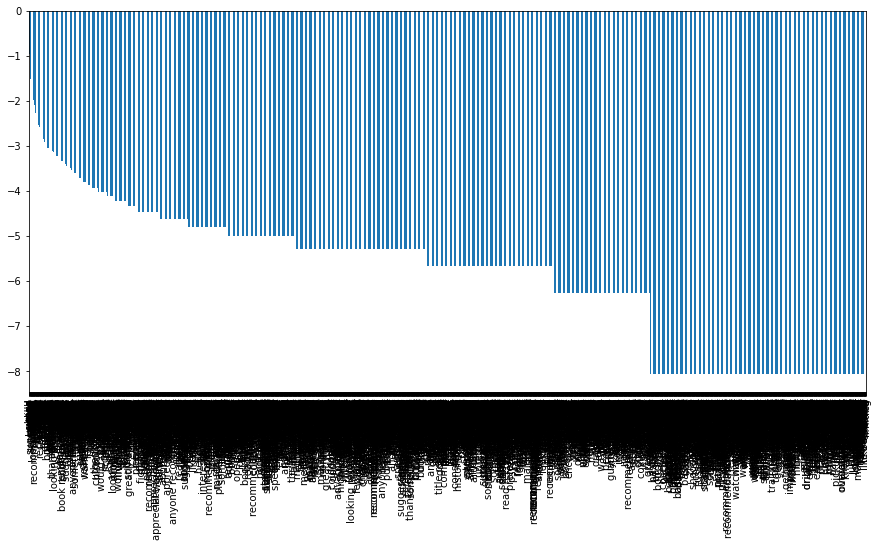

In [389]:
#see coef for all words (take time)
pd.Series(pipe_nb_best_est[1].coef_[0], index=pipe_nb_best_est[0].get_feature_names()).sort_values(ascending=False).plot.bar(figsize=(15, 7))

In [437]:
#sample predict probability of key word of booksuggestions
pipe_nb_best_est.predict_proba(["book"])

array([[0.00111198, 0.99888802]])

In [445]:
#sample predict probability of key word of basketball
pipe_nb_best_est.predict_proba(["aaron"])

array([[0.92251366, 0.07748634]])

# 5. Logistic Regression Model

### PipeLine & GridSearch

In [390]:
# create pipeline
lr_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])


In [391]:
# set hyper parameters
lr_pipe_params = {
    'cvec__max_features': [1_000,2_000, 3_000],
    'cvec__min_df': [2, 3,4],
    'cvec__max_df': [.9, .95,.98],
    'cvec__ngram_range': [(1,1), (1,2)],
    'lr__C': [1, 1.5, 2, 2.5],
    'lr__penalty': ['l1','l2']
}

In [392]:
# Instantiate GridSearchCV.

lr_gs = GridSearchCV(lr_pipe, # what object are we optimizing?
                  param_grid=lr_pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [393]:
#fit on the training data
lr_gs.fit(clean_train_posts,  y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9, 0.95, 0.98],
                         'cvec__max_features': [1000, 2000, 3000],
                         'cvec__min_df': [2, 3, 4],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'lr__C': [1, 1.5, 2, 2.5],
                         'lr__penalty': ['l1', 'l2']})

In [394]:
#get best score
lr_gs.best_score_ # cv score

0.989574297188755

In [395]:
#get best estimator
lr_gs_model =lr_gs.best_estimator_

In [396]:
lr_gs_model.score(clean_test_posts,y_test)

0.9850467289719627

In [397]:
#see the best parameters
lr_gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'lr__C': 2.5,
 'lr__penalty': 'l2'}

### Logistic Regression Model with Best Estimator  

In [398]:
# Instantiate logistic regression model.
lr = LogisticRegression(penalty='l2',C=2.5)

# Fit model to training data.
lr.fit(train_data_features, y_train)

LogisticRegression(C=2.5)

In [399]:
# Evaluate model on training data.
lr.score(train_data_features, y_train)

1.0

In [400]:
# Evaluate model on unseen data.
cross_val_score(lr,train_data_features,y_train,cv=5).mean()

0.9855582329317268

In [401]:
# Evaluate model on testing data.
lr.score(test_data_features, y_test)

0.983177570093458

In [424]:
# see get the y_pred and see the confusion_matrix
predictions = lr.predict(test_data_features)
confusion_matrix(y_test, predictions)

array([[258,   1],
       [  8, 268]], dtype=int64)

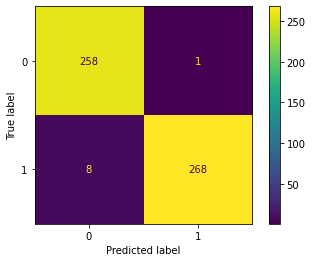

In [425]:
plot_confusion_matrix(lr, test_data_features, y_test) 

### Performance of model is good on Training/ unseen data and testing data but slightly over fit

In [402]:
lr_coef = pd.Series(data = np.exp(lr_gs_model[1].coef_[0]),index=lr_gs_model[0].get_feature_names()  )
#show top 10 high coef in class 1 [book] ,0 [basketball]
lr_coef.sort_values(ascending=False)[:10],lr_coef.sort_values(ascending=False)[-10:]

(book              32.736876
 novel              6.529013
 read               5.681361
 reading            4.501557
 something          4.312672
 suggestion         3.208955
 similar            3.043980
 looking            3.003017
 recommendation     2.228584
 life               2.206644
 dtype: float64,
 shot          0.492075
 poll          0.481417
 player        0.465351
 nba           0.435620
 kg            0.422762
 ball          0.385960
 game          0.366322
 team          0.353868
 play          0.277602
 basketball    0.143543
 dtype: float64)

<AxesSubplot:>

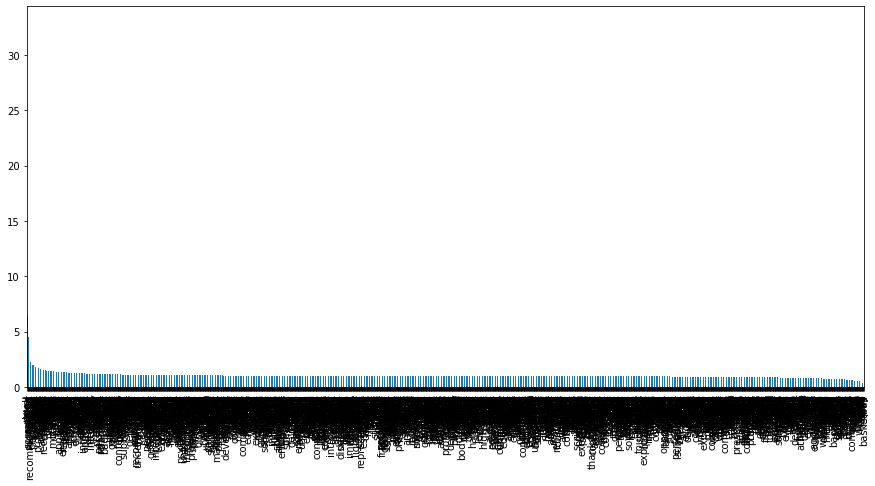

In [405]:
#the book has highest coef about 32 and the novel just 6.5
lr_coef.sort_values(ascending=False).plot.bar(figsize=(15, 7))

# 6. Voting Classifier Model

In [403]:
# create pipeline
vote = VotingClassifier( [
    ('lr', LogisticRegression() ),
    ('nb', BernoulliNB() ),
    ('tree', DecisionTreeClassifier() ),
    ('ada', AdaBoostClassifier() ),
    ('gb', GradientBoostingClassifier() )
])
# set hyper parameters
vote_param = {
    'lr__C': [1, 1.5, 2, 2.5],
    'nb__alpha' : [0.1,0.2,0.3],
    'tree__max_depth' : [None,4,5],
    'ada__n_estimators' : [100,120],
    'gb__n_estimators' : [125,150],   
}
#grid Search
vote_gs  = GridSearchCV(vote, 
                  param_grid=vote_param, 
                  cv=5)

In [404]:
#fit model to training data
vote_gs.fit(train_data_features,y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression()),
                                                    ('nb', BernoulliNB()),
                                                    ('tree',
                                                     DecisionTreeClassifier()),
                                                    ('ada',
                                                     AdaBoostClassifier()),
                                                    ('gb',
                                                     GradientBoostingClassifier())]),
             param_grid={'ada__n_estimators': [100, 120],
                         'gb__n_estimators': [125, 150],
                         'lr__C': [1, 1.5, 2, 2.5],
                         'nb__alpha': [0.1, 0.2, 0.3],
                         'tree__max_depth': [None, 4, 5]})

In [406]:
#get the best parameters
vote_gs.best_params_

{'ada__n_estimators': 120,
 'gb__n_estimators': 125,
 'lr__C': 1,
 'nb__alpha': 0.1,
 'tree__max_depth': None}

In [407]:
#get the best score
vote_gs.best_score_

0.986364658634538

In [412]:
#get the best estimator
best_model_vote_gs = vote_gs.best_estimator_

In [409]:
best_model_vote_gs.score(test_data_features,y_test)

0.9794392523364486

In [413]:
print(f'Score on Train data= {vote_gs.best_score_}')
print(f'Score on Test data= {best_model_vote_gs.score(test_data_features, y_test)}')

Score on Train data= 0.986364658634538
Score on Test data= 0.9794392523364486


### Performance of model is not good as Naive Bayes and slightly over fit same as Logistic Regression